<a href="https://colab.research.google.com/github/sametcankarakas/Data-Science---Intro/blob/main/SametCanKARAKAS_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalanced Data Çalışması

In [2]:
pip install -U imbalanced-learn

     |████████████████████████████████| 199 kB 4.4 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [1]:
import pandas as pd
# veriyi raw şekilde githubdan atıp csv'ye döküyoruz.
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/hcv_classification.csv', index_col=False)

In [4]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active


In [3]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

## Class distribution

In [5]:
#70 e 30 luk bir dağılım mevcut(daha da kötüsü olabilirdi aslında)
y.value_counts()

active      412
inactive    166
Name: Activity, dtype: int64

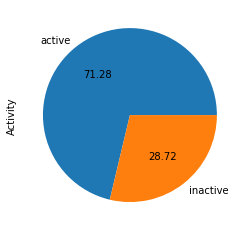

In [6]:
# pasta grafiği (pie plot)
y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Pasta grafiği 2
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=activity_count.index);

### Random Undersampling

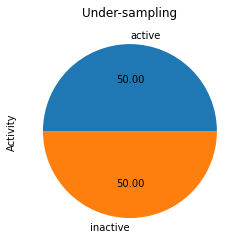

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # sayı için
# rus = RandomUnderSampler(sampling_strategy="not minority") # String için
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [8]:
# Dağılım
y_res.value_counts()

active      166
inactive    166
Name: Activity, dtype: int64

### Random Oversampling

"not majority" = çoğunluk harici sınıfları yeniden örnekle

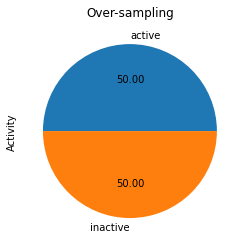

In [9]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String 
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [10]:
y_res.value_counts()

active      412
inactive    412
Name: Activity, dtype: int64